In [4]:
%matplotlib inline

In [140]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
import time

In [77]:
data = netCDF4.Dataset('data/G10010_SIBT1850_v1.1.nc', 'r', format='NETCDF4')

In [78]:
data.variables

OrderedDict([(u'latitude', <type 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees
                  axis: Y
              unlimited dimensions: 
              current shape = (240,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'longitude', <type 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees
                  axis: X
              unlimited dimensions: 
              current shape = (1440,)
              filling on, default _FillValue of 9.96920996839e+36 used),
             (u'seaice_conc', <type 'netCDF4._netCDF4.Variable'>
              float32 seaice_conc(time, latitude, longitude)
                  short_name: concentration
                  long_name: Sea_Ice_Concentra

In [79]:
print ('Longitudes of the variables:')
print '\t Longitude:', data['longitude'].shape
print '\t Latitude:', data['latitude'].shape
print '\t Ice concentration:', data['seaice_conc'].shape
print '\t Ice source:', data['seaice_source'].shape
print '\t Time', data['time'].shape


Longitudes of the variables:
	 Longitude: (1440,)
	 Latitude: (240,)
	 Ice concentration: (1968, 240, 1440)
	 Ice source: (1968, 240, 1440)
	 Time (1968,)


In [80]:
lon = data['longitude']
lat = data['latitude']
time = data['time']
conc = data['seaice_conc']

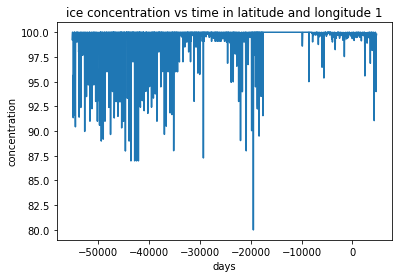

In [81]:
plt.plot(time,conc[:,1,1])
plt.xlabel('days')
plt.ylabel('concentration')
plt.title('ice concentration vs time in latitude and longitude 1')
plt.show()

In [175]:
def plot_ice_conc(conc, lon, lat, idx, title=None, save_path=None):
    fig = plt.figure(1, figsize=(10,6))
    init_lon = np.min(lon)
    init_lat = np.min(lat)
    end_lon = np.max(lon)
    end_lat = np.max(lat)

    cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue', 'black', 'white'], 256)
    img = plt.imshow(conc[idx,:,:], origin='lower', interpolation='quadric', extent=[init_lon, end_lon, init_lat, end_lat], cmap=cmap, aspect='auto')
    plt.colorbar(img, cmap=cmap)
    if title is not None:
        plt.title(title)
    if save_path is not None:
        plt.savefig(save_path)
    plt.ion()
    plt.show()
    plt.close()
    

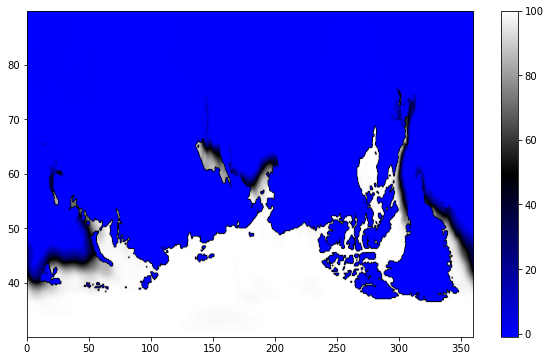

In [176]:
plot_ice_conc(conc, lon, lat, 1)
